<a href="https://colab.research.google.com/github/itberrios/algotrading/blob/main/descriptive_analytics/data_explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration**

In this notebook we will load the data and inspect it.

## Install libraries

In [ ]:
!pip install alpha_vantage

In [ ]:
!pip install pandas_ta

## Get stock data

In [16]:
!git clone https://github.com/itberrios/algotrading

Cloning into 'algotrading'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 95 (delta 27), reused 52 (delta 7), pack-reused 0
Unpacking objects: 100% (95/95), done.


## Base Library

These [regex](https://docs.python.org/3/library/re.html) are [useful](https://stackoverflow.com/questions/2973436/regex-lookahead-lookbehind-and-atomic-groups). So is [this](https://www.regular-expressions.info/lookaround.html).

In [47]:
import os
import re
from glob import glob
import numpy as np
import pandas as pd
import pandas_ta as ta
import alpha_vantage
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
%matplotlib inline

#### Get data and write utility functions

In [15]:
csv_paths = sorted(glob(r'algotrading/data/*.csv'))

In [53]:
get_name = lambda x : re.search('\w+(?=_15min)', x).group()

In [55]:
for _path in csv_paths:
    df = pd.read_csv(_path, index_col=0)
    print(df.shape, df.index[0], ' ', df.index[1])

(31623, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(15526, 5) 2020-10-02 09:30:00   2020-10-02 09:45:00
(31152, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(14890, 5) 2020-10-02 08:15:00   2020-10-02 09:30:00
(13970, 5) 2020-10-02 09:45:00   2020-10-02 10:00:00
(20493, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(16795, 5) 2020-10-01 07:30:00   2020-10-01 07:45:00
(28458, 5) 2020-10-02 04:15:00   2020-10-02 04:30:00
(24398, 5) 2020-10-01 04:15:00   2020-10-01 04:45:00
(20860, 5) 2020-10-02 04:30:00   2020-10-02 05:30:00
(15754, 5) 2020-10-02 08:15:00   2020-10-02 08:30:00
(14366, 5) 2020-10-02 07:15:00   2020-10-02 07:30:00
(30076, 5) 2020-10-01 04:15:00   2020-10-01 04:30:00
(15085, 5) 2020-10-02 08:15:00   2020-10-02 09:30:00
(14030, 5) 2020-10-02 07:15:00   2020-10-02 08:15:00
(16305, 5) 2020-10-02 04:15:00   2020-10-02 06:15:00
(15811, 5) 2020-10-02 08:15:00   2020-10-02 09:45:00
(22748, 5) 2020-10-02 04:15:00   2020-10-02 05:00:00
(13665, 5) 2020-10-02 06:00:00   2020-10-02 06

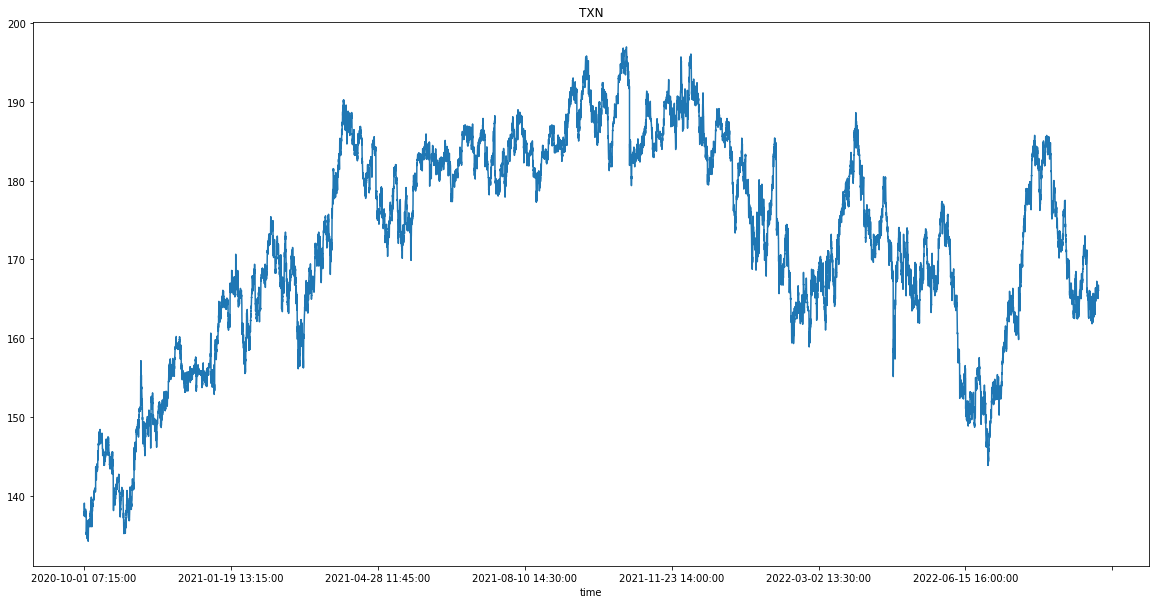

In [58]:
df['close'].plot(figsize=(20, 10))
plt.title(get_name(_path));

## Get closing times

In [82]:
# closing_times = {}
closing_times = []
for _path in csv_paths:
    # get Pandas Series with appropriate name
    ser = pd.read_csv(_path, index_col=0)['close']
    ser.name = get_name(_path)

    # remove duplicates
    ser = ser[~ser.index.duplicated()]

    closing_times.append(ser)
    # closing_times.update({get_name(_path) : df['close']})

In [84]:
close_df = pd.concat(closing_times, axis=1)
close_df.shape

(31744, 30)

## Display percentage of NaNs in each stock closing price

In [91]:
close_df.isna().sum() / len(close_df) * 100

AAPL     0.381174
ADI     51.089970
AMD      1.864919
ANET    53.093498
APH     55.991683
ASML    35.442918
AVGO    47.092364
BA      10.351562
CSCO    23.141381
ENPH    34.286794
FTNT    50.371724
GD      54.744204
INTC     5.456149
KLAC    52.479209
LHX     55.802671
LMT     48.733619
MCHP    50.192162
MRVL    28.339214
MSI     56.952495
MU      10.187752
NOC     54.882812
NVDA     5.582157
NXPI    48.346144
QCOM    21.944304
RTX     43.709047
STM     33.845766
TDG     57.327369
TEL     56.810736
TSM     10.512223
TXN     45.725176
dtype: float64

In [87]:
close_df.corr()

,AAPL,ADI,AMD,ANET,APH,ASML,AVGO,BA,CSCO,ENPH,...,NOC,NVDA,NXPI,QCOM,RTX,STM,TDG,TEL,TSM,TXN
AAPL,1.000000,0.679804,0.680467,0.943934,0.866111,0.472393,0.911567,-0.235451,0.685622,0.504705,...,0.655321,0.762163,0.482451,0.666285,0.762063,0.567555,0.508105,0.626875,0.094081,0.473281
ADI,0.679804,1.000000,0.664597,0.706991,0.854417,0.823343,0.708378,0.192950,0.764312,0.518766,...,0.371872,0.731812,0.843991,0.498849,0.647781,0.711253,0.694858,0.865937,0.435795,0.874885
AMD,0.680467,0.664597,1.000000,0.685837,0.836782,0.680458,0.663878,0.084085,0.685824,0.243827,...,0.111326,0.924861,0.638557,0.804957,0.349290,0.892924,0.382679,0.792394,0.412263,0.511866
ANET,0.943934,0.706991,0.685837,1.000000,0.870073,0.476278,0.936234,-0.223586,0.658527,0.550960,...,0.699088,0.790947,0.495324,0.641357,0.797605,0.561046,0.556122,0.629338,0.077287,0.477527
APH,0.866111,0.854417,0.836782,0.870073,1.000000,0.735709,0.819886,0.043258,0.802804,0.492787,...,0.445461,0.862753,0.736748,0.688009,0.636045,0.797979,0.633614,0.869786,0.314786,0.711693
ASML,0.472393,0.823343,0.680458,0.476278,0.735709,1.000000,0.492334,0.483678,0.900925,0.126314,...,0.032652,0.758581,0.908566,0.415238,0.408461,0.802153,0.596458,0.905255,0.657736,0.898913
AVGO,0.911567,0.708378,0.663878,0.936234,0.819886,0.492334,1.000000,-0.247726,0.680677,0.419700,...,0.674424,0.762789,0.544000,0.604803,0.816528,0.573821,0.497500,0.621467,0.148326,0.494703
BA,-0.235451,0.192950,0.084085,-0.223586,0.043258,0.483678,-0.247726,1.000000,0.408427,-0.282488,...,-0.625647,0.079894,0.514529,0.105009,-0.211029,0.315876,0.453143,0.398216,0.752243,0.487502
CSCO,0.685622,0.764312,0.685824,0.658527,0.802804,0.900925,0.680677,0.408427,1.000000,0.102420,...,0.212432,0.804171,0.874895,0.526917,0.607024,0.754302,0.661223,0.892106,0.591820,0.824382
ENPH,0.504705,0.518766,0.243827,0.550960,0.492787,0.126314,0.419700,-0.282488,0.102420,1.000000,...,0.520020,0.218386,0.166383,0.207668,0.413474,0.160709,0.333493,0.278747,-0.174556,0.282940


AAPL, MSI, APH, ANET

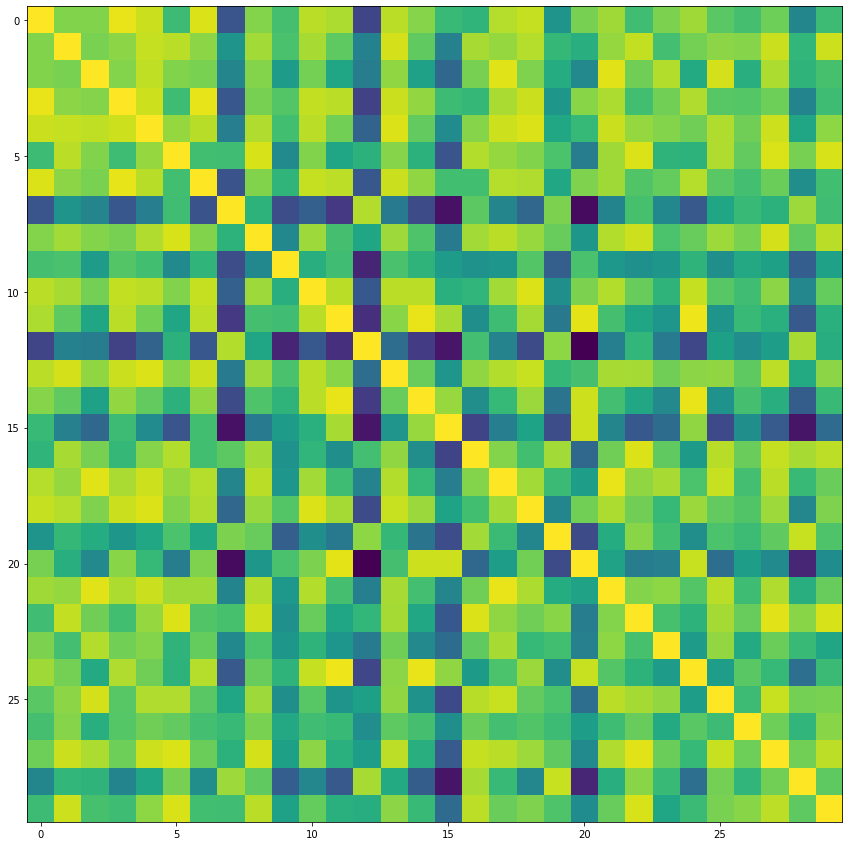

In [89]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(close_df.corr().to_numpy())